# Bike Sales Analysis

## Project Objective
Help a bike company identify high-revenue customers and countries to expand into, using sales data.

## Key Questions Answered
- Who are our top customers?
- Which countries generate the most revenue per customer?
- What age group should we target with marketing?

## Tools Used
- Python (pandas, matplotlib, seaborn)
- Jupyter Notebook

##  Summary of Findings
- The US generates the most revenue by country
- Australia and Germany have the highest revenue per customer.
- 28-year-olds generate the most revenue by age.
- Age group 35–64 has the highest group spending power.
- Road Bikes are the most profitable bike model 
- Sales are highest in December due to holiday sales




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Importing the dataset and checking the data type of each column
df= pd.read_csv(r"C:\Users\osaze\OneDrive\Desktop\MySQL\Projects\Datasets\Sales Data for Bike Company.csv")
df.head()
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [20]:
#Convert the 'Date' column from string to datetime format for accurate time-based analysis.
df['Date']= pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

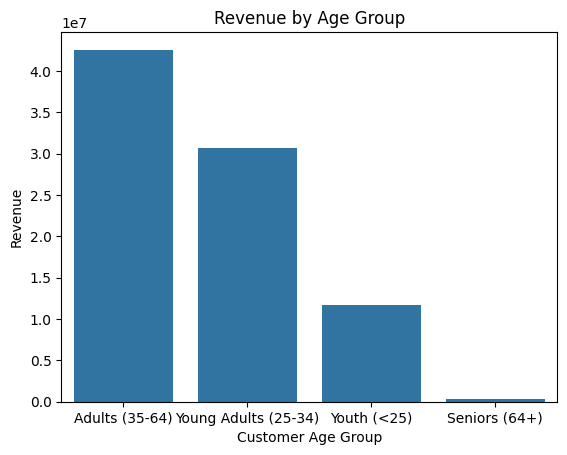

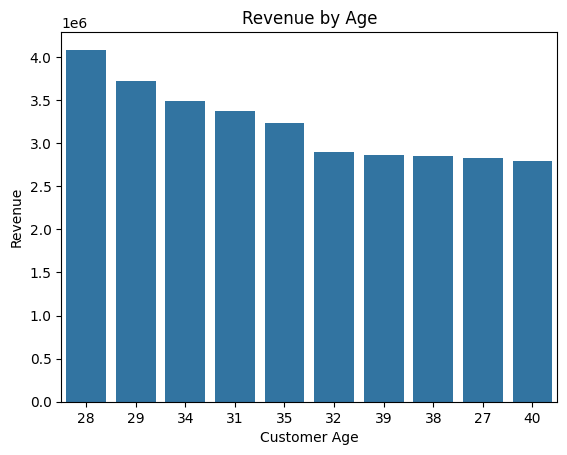

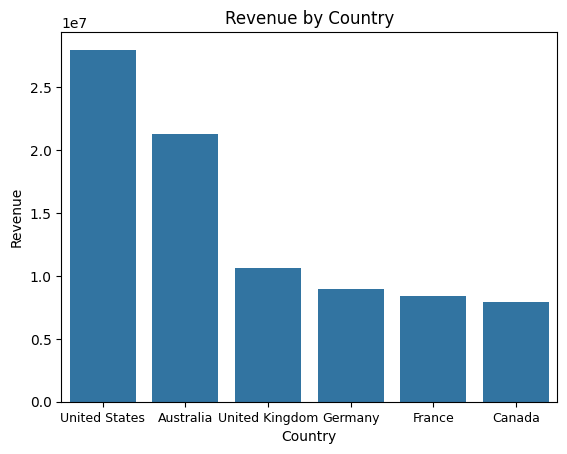

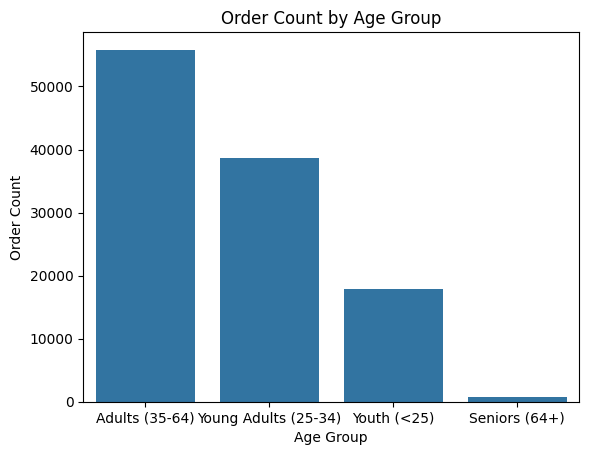

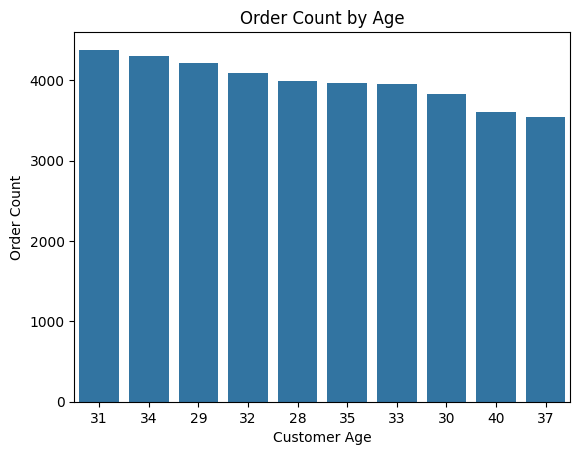

In [26]:
# Which customers generate the most revenue?
# Analyze top-selling customer segments by age group, specific age, and country.

# Grouping by Age Group
top_customer_by_age_group = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Grouping by Specific Age
top_customer_by_age = df.groupby('Customer_Age')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(10)

# Grouping by Country
top_customer_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Barplot: Revenue by Age Group
sns.barplot(data=top_customer_by_age_group, x='Age_Group', y='Revenue')
plt.title('Revenue by Age Group')
plt.xlabel("Customer Age Group")
plt.ylabel('Revenue')
plt.show()

# Finding: Adults aged 35–64 generate the highest overall revenue compared to other age groups.

# Barplot: Revenue by Specific Age
sns.barplot(data=top_customer_by_age, x='Customer_Age', y='Revenue', order=top_customer_by_age['Customer_Age'])
plt.title('Revenue by Age')
plt.xlabel("Customer Age")
plt.ylabel('Revenue')
plt.show()

# Insight: 28-year-olds are the single age group with the highest revenue contribution.
sns.barplot(data=top_customer_by_country, x='Country', y='Revenue')
plt.title('Revenue by Country')
plt.xlabel("Country")
plt.ylabel('Revenue')
plt.xticks(fontsize=9)
plt.show()

# Insight: The United States leads in total revenue by a significant margin.

# Hypothesis: The 35-64 age group brings in more revenue because they are most likely the largest order base.
## However, let's count the total number of orders in each age group to confirm this hypothesis.
age_group_counts = df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Order_Count']
age_group_counts = age_group_counts.sort_values(by='Order_Count', ascending=False)
sns.barplot(data=age_group_counts, x='Age_Group', y='Order_Count')
plt.title('Order Count by Age Group')
plt.xlabel("Age Group")
plt.ylabel('Order Count')
plt.show()

# Finding: The 35-64 age group has the highest number of orders, supporting the hypothesis that their larger order base contributes to higher overall revenue.
# Let's also look at the total number of orders by specific age to see if 28-year-olds are also the largest single-age order group.
df['Customer_Age'] = df['Customer_Age'].astype(str)
age_customer_counts = df['Customer_Age'].value_counts().reset_index()
age_customer_counts.columns = ['Customer_Age', 'Order_Count']
age_customer_counts = age_customer_counts.sort_values(by='Order_Count', ascending=False)
sns.barplot(data=age_customer_counts.head(10), x='Customer_Age', y='Order_Count')
plt.title('Order Count by Age')
plt.xlabel("Customer Age")
plt.ylabel('Order Count')
plt.show()
# To do this, I first had to change the customer age column to str to avoid issues with seaborn sorting ages as numbers instead of categories.
# Finding: 31-year-olds are the largest single-age order group, not 28-year-olds.
## This suggest that 28-year olds generate more revenue on average per customer compared to other ages.

          Country  Revenue Per Order
0       Australia         889.959016
1         Germany         809.028293
2  United Kingdom         781.659031
3          France         766.764139
4   United States         713.552696
5          Canada         559.721964


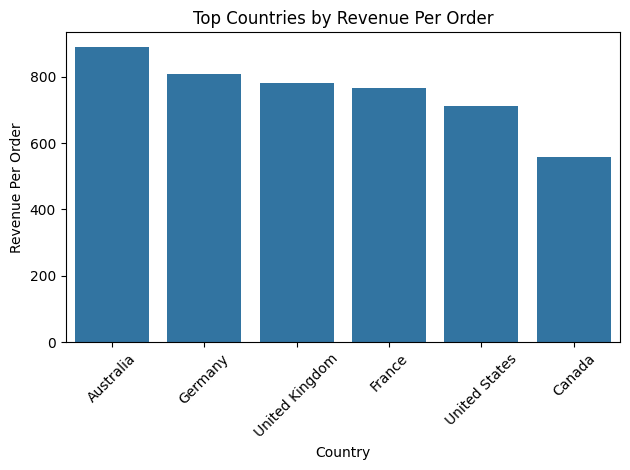

In [22]:
# "Which countries should we focus on growing next?"
#  Objective: Identify countries with high revenue per order to target for expansion.
## We are calculating revenue per order instead of per customer due to the lack of unique customer identifiers in the dataset.

# Calculate revenue per order by country
revenue_per_order = df.groupby('Country')['Revenue'].sum() / df['Country'].value_counts()
revenue_per_order = revenue_per_order.sort_values(ascending=False).reset_index()
revenue_per_order.columns = ['Country', 'Revenue Per Order']

# Display the results
print(revenue_per_order.head(10))

# Visualize 
sns.barplot(data=revenue_per_order.head(10), x='Country', y='Revenue Per Order')
plt.title('Top Countries by Revenue Per Order')
plt.xticks(rotation=45)
plt.ylabel('Revenue Per Order')
plt.tight_layout()
plt.show()

# Insight:
# Australia and Germany rank highest in revenue per order despite not being the top overall revenue contributors.
# Recommendation:
# These countries show strong purchasing power. Increase marketing efforts, customer acquisition, and local partnerships there to boost overall revenue without sacrificing profitability.


     Sub_Category    Profit
0      Road Bikes  10078875
1  Mountain Bikes   8160463
2   Touring Bikes   2279938


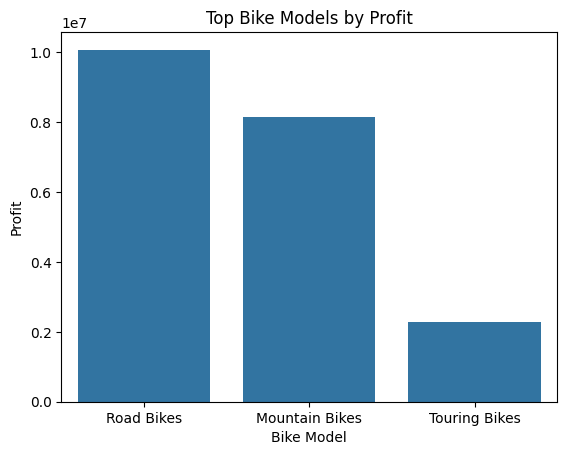

In [23]:
# “I want to make more money. Which bike models should I focus on to boost profits?”
# Objective: Identify the top-performing bike models based on profit.

# Filter for only Bike sales and group by model (Sub_Category)
top_bike_model = df[df['Product_Category'] == 'Bikes'].groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()

# Display the result
print(top_bike_model)

# Visualize the top bike models by revenue
sns.barplot(data=top_bike_model, x='Sub_Category', y='Profit')
plt.title('Top Bike Models by Profit')
plt.xlabel('Bike Model')
plt.ylabel('Profit')
plt.show()

# Insight: Road Bikes is the most profitable Bike model.
# Recommendation: Prioritize marketing, inventory, and availability of Road Bikes to maximize profit growth.


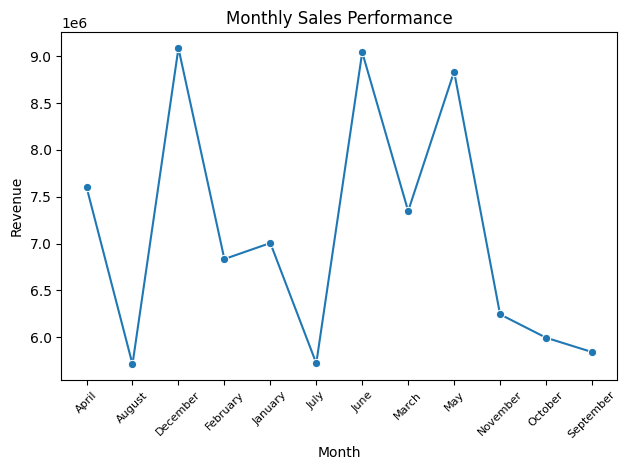

In [24]:
# "When during the year do my sales spike? How can I time promotions to maximize revenue?"
# Objective: Identify peak months for sales to inform marketing and inventory strategy.

# Group revenue by month and sort in descending order
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Visualize revenue trends across months
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# Insight: December shows the highest revenue, likely due to holiday-season sales.
# Recommendation: Launch promotions and increase stock availability leading into Q4, especially November–December, to capitalize on peak demand.
